In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya plot tampil lebih bagus
sns.set_style("whitegrid")



In [2]:
import sys 
print(sys.executable)


/Users/septian/Downloads/AI ML Batch 8/Day 51 - Final Project Introduction/Final Project/.venv/bin/python


In [3]:
df = pd.read_csv("../data/loan_data.csv")

df.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Overview

In [4]:
df.shape
df.info()
df.describe()
df.isnull().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [9]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [10]:
# info
df.info()

# missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

Series([], dtype: int64)

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Numeric:", len(num_cols))
print("Categorical:", len(cat_cols))

Numeric: 30
Categorical: 6


In [12]:
selected_features = [
    "MonthlyLoanPayment",
    "MonthlyIncome",
    "TotalDebtToIncomeRatio",
    "CreditCardUtilizationRate",
    "PreviousLoanDefaults",
    "PaymentHistory"
]

data = df[selected_features].copy()

print("Shape:", data.shape)
data.head()

Shape: (20000, 6)


,MonthlyLoanPayment,MonthlyIncome,TotalDebtToIncomeRatio,CreditCardUtilizationRate,PreviousLoanDefaults,PaymentHistory
0,419.805992,3329.000000,0.181077,0.354418,0,29
1,794.054238,3309.083333,0.389852,0.087827,0,21
2,666.406688,3393.666667,0.462157,0.137414,0,20
3,1047.506980,5757.000000,0.313098,0.267587,0,27
4,330.179140,8605.333333,0.070210,0.320535,0,26


## Data Overview

In [24]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyLoanPayment         20000 non-null  float64
 1   MonthlyIncome              20000 non-null  float64
 2   TotalDebtToIncomeRatio     20000 non-null  float64
 3   CreditCardUtilizationRate  20000 non-null  float64
 4   PreviousLoanDefaults       20000 non-null  int64  
 5   PaymentHistory             20000 non-null  int64  
 6   payment_ratio              20000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.1 MB


,count,mean,std,min,25%,50%,75%,max
MonthlyLoanPayment,20000.0,861.862292,488.873766,97.030193,493.763700,728.511452,1112.770759,2041.281346
MonthlyIncome,20000.0,4720.178485,2723.568921,1250.000000,2629.583333,4034.750000,6163.000000,11463.125000
TotalDebtToIncomeRatio,20000.0,0.379699,0.260513,0.016043,0.179693,0.302711,0.509214,1.003494
CreditCardUtilizationRate,20000.0,0.286055,0.158791,0.000974,0.160794,0.266673,0.390634,0.735394
PreviousLoanDefaults,20000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PaymentHistory,20000.0,23.976750,4.872248,12.000000,21.000000,24.000000,27.000000,36.000000
payment_ratio,20000.0,0.255324,0.227030,0.010634,0.102144,0.183183,0.328322,1.633025


## Missing Value Check

In [14]:
missing = data.isnull().sum().to_frame("missing_count")
missing["missing_pct"] = (missing["missing_count"] / len(data)) * 100
missing.sort_values("missing_pct", ascending=False)

,missing_count,missing_pct
MonthlyLoanPayment,0,0.0
MonthlyIncome,0,0.0
TotalDebtToIncomeRatio,0,0.0
CreditCardUtilizationRate,0,0.0
PreviousLoanDefaults,0,0.0
PaymentHistory,0,0.0


## Histogram 

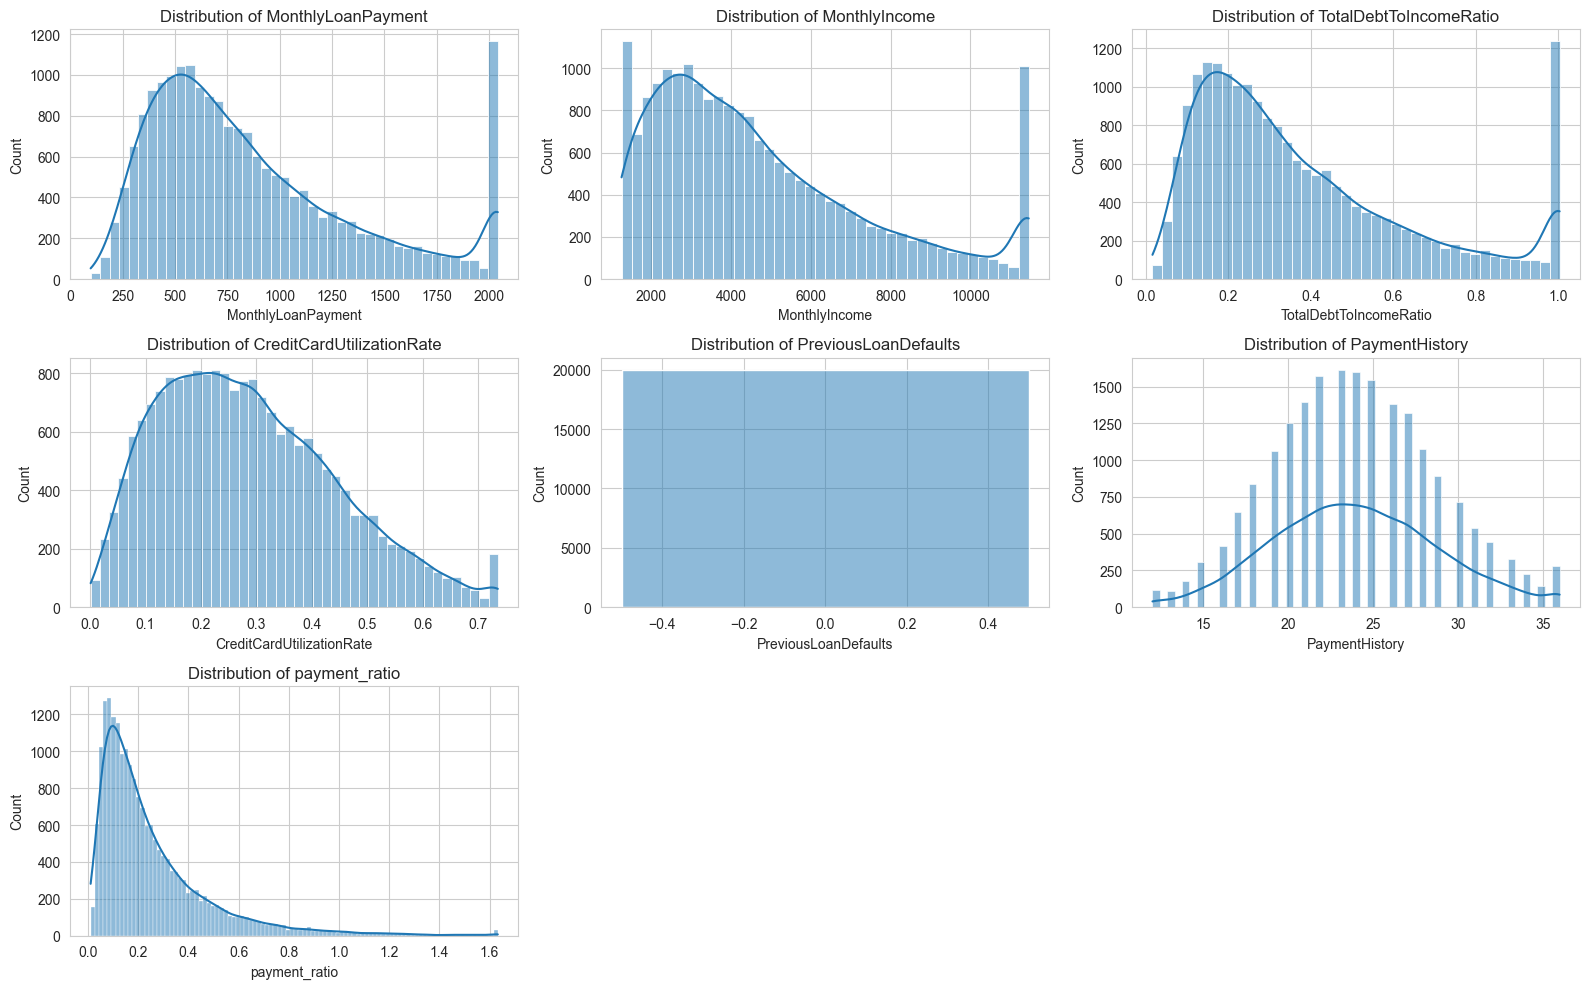

In [25]:
num_cols = data.columns

plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Distribution Plot (Univariate)

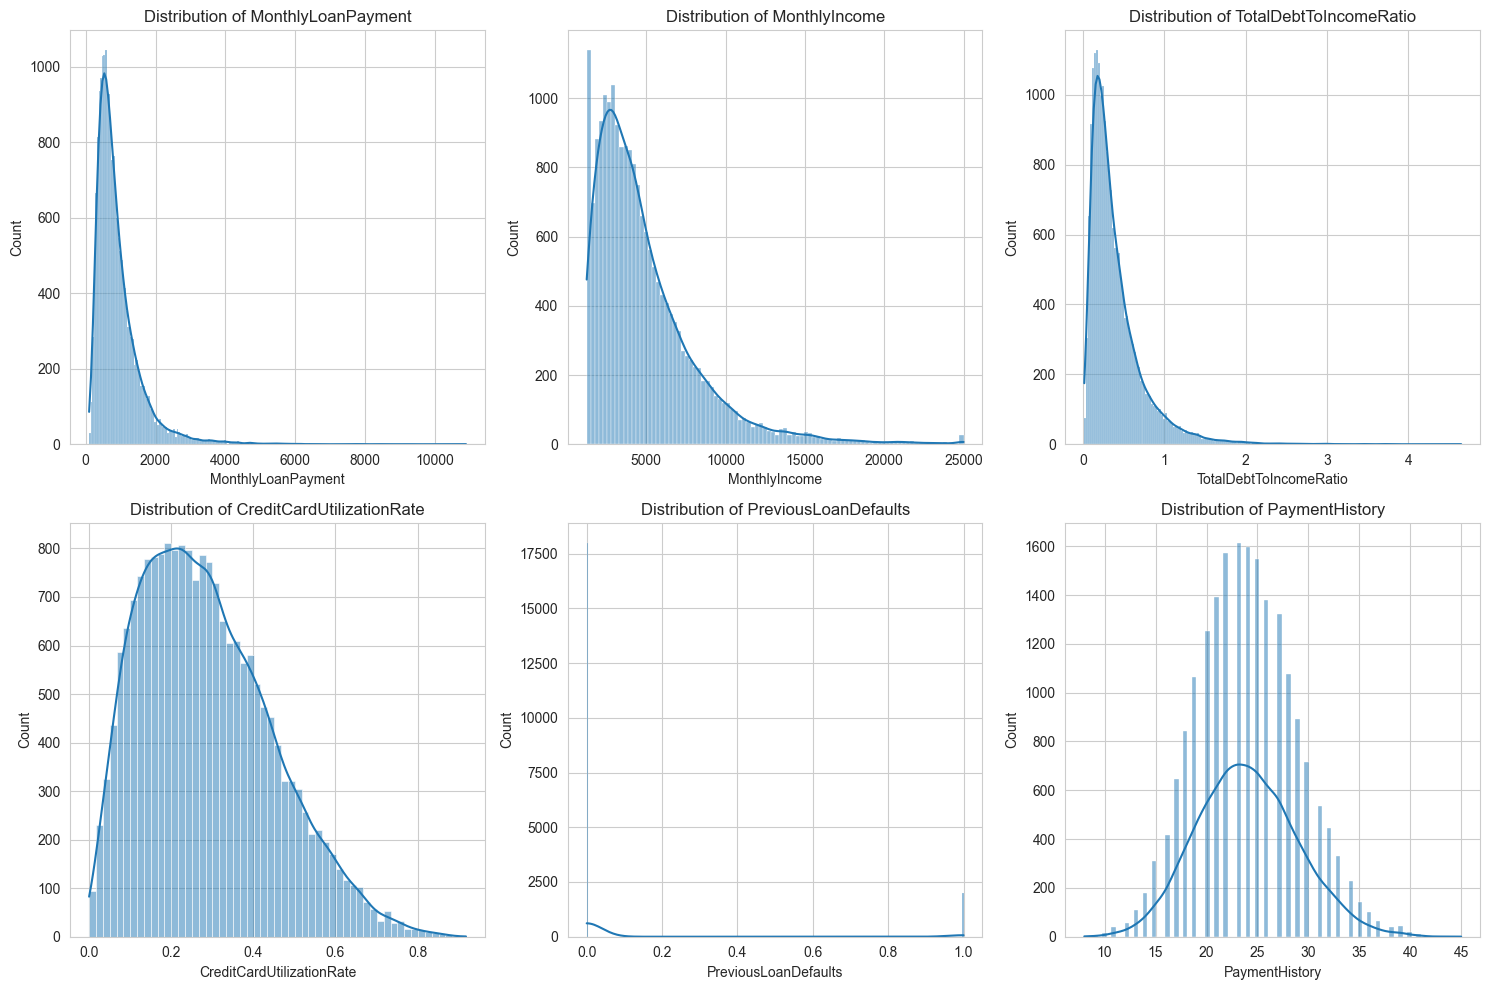

In [ ]:
num_cols = data.columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Outlier Detection (Boxplot)

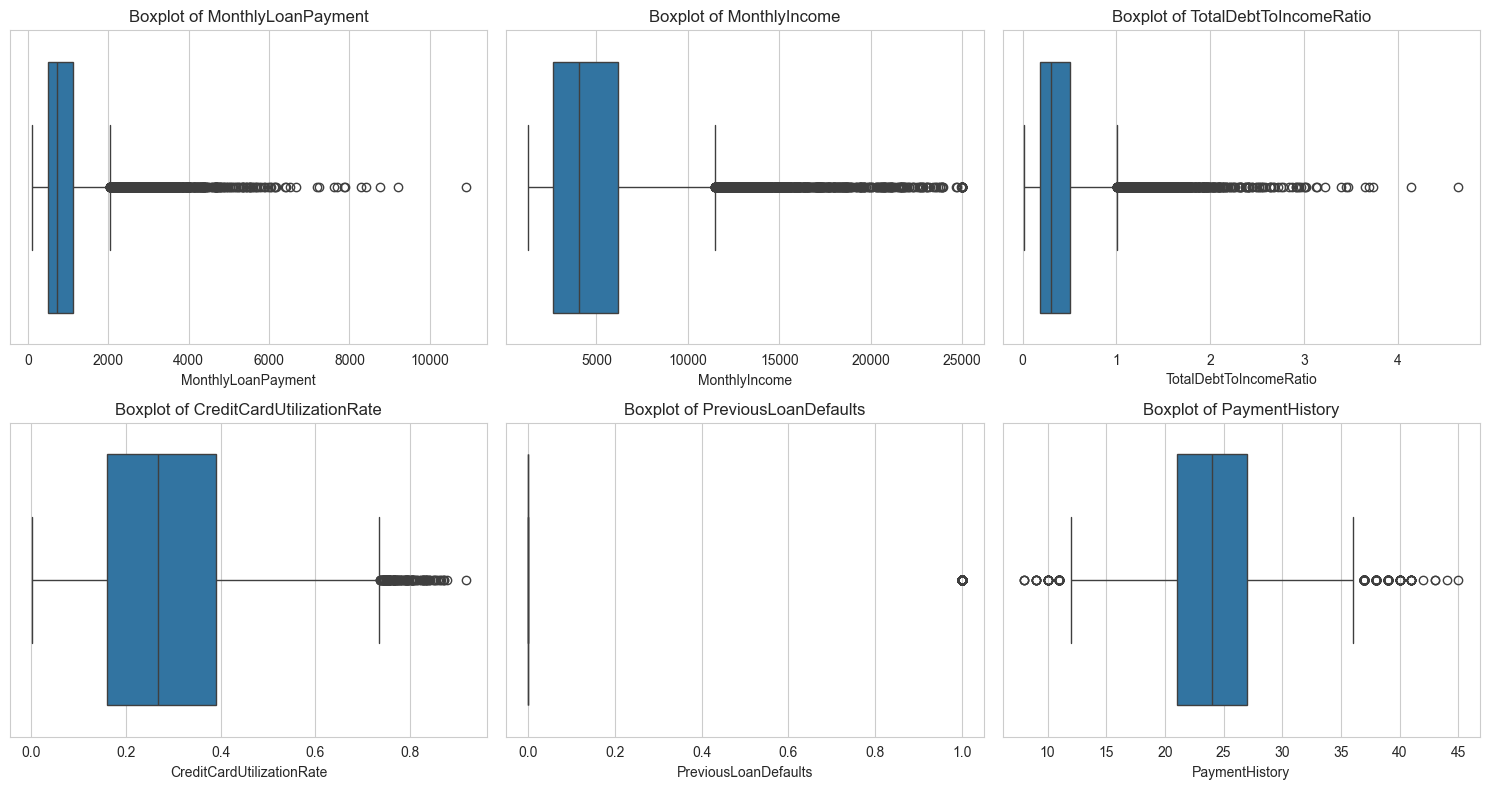

In [16]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Feature Engineering Check

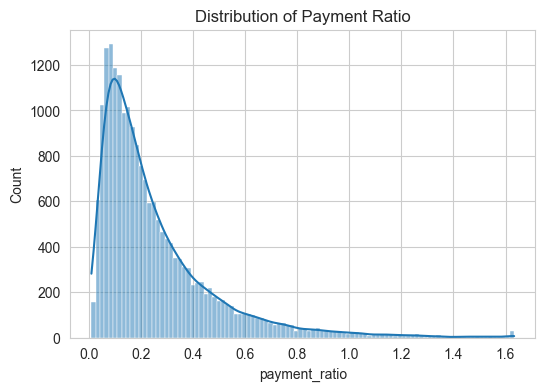

count    20000.000000
mean         0.255324
std          0.227030
min          0.010634
25%          0.102144
50%          0.183183
75%          0.328322
max          1.633025
Name: payment_ratio, dtype: float64

In [18]:
data["payment_ratio"] = (
    data["MonthlyLoanPayment"] /
    (data["MonthlyIncome"] + 1e-6)
)

plt.figure(figsize=(6,4))
sns.histplot(data["payment_ratio"], kde=True)
plt.title("Distribution of Payment Ratio")
plt.show()

data["payment_ratio"].describe()

## Correlation Analysis

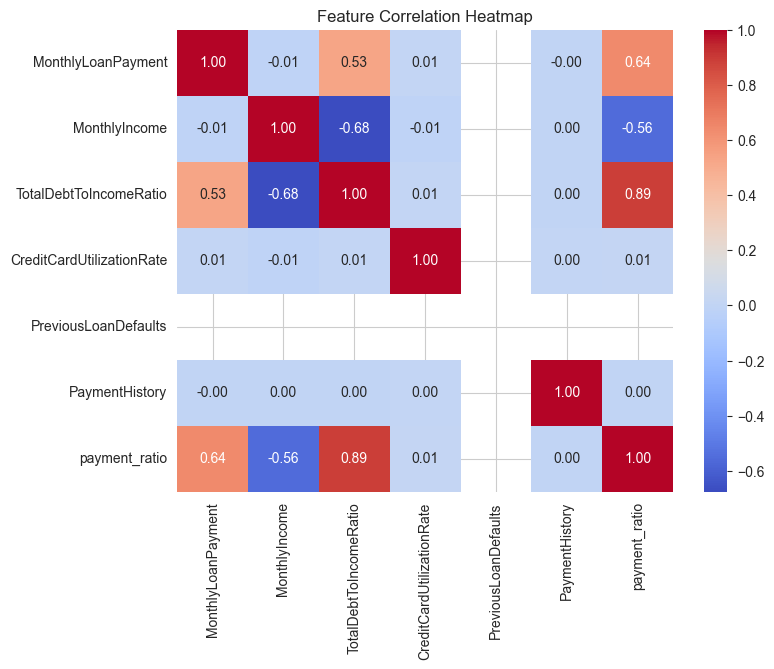

In [20]:
plt.figure(figsize=(8,6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

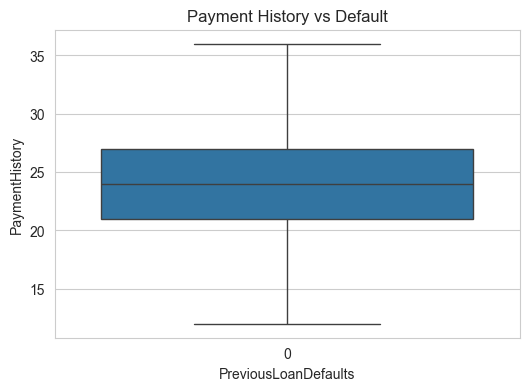

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["PreviousLoanDefaults"],
    y=data["PaymentHistory"]
)
plt.title("Payment History vs Default")
plt.show()

## Distribusi Target (Risk)

In [ ]:
df["PreviousLoanDefaults"].value_counts()


PreviousLoanDefaults
0    17999
1     2001
Name: count, dtype: int64

## Distribusi Payment Behavior

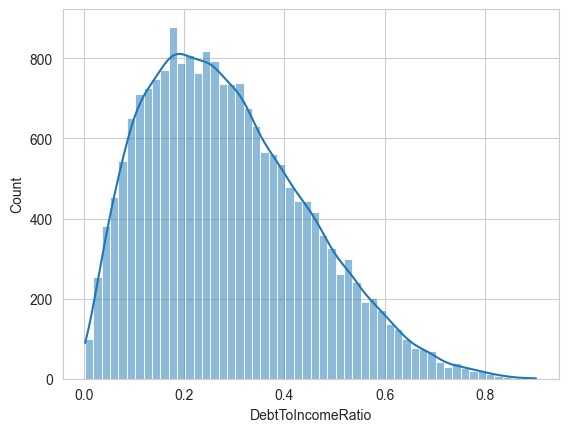

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["DebtToIncomeRatio"], kde=True)
plt.show()


## Korelasi

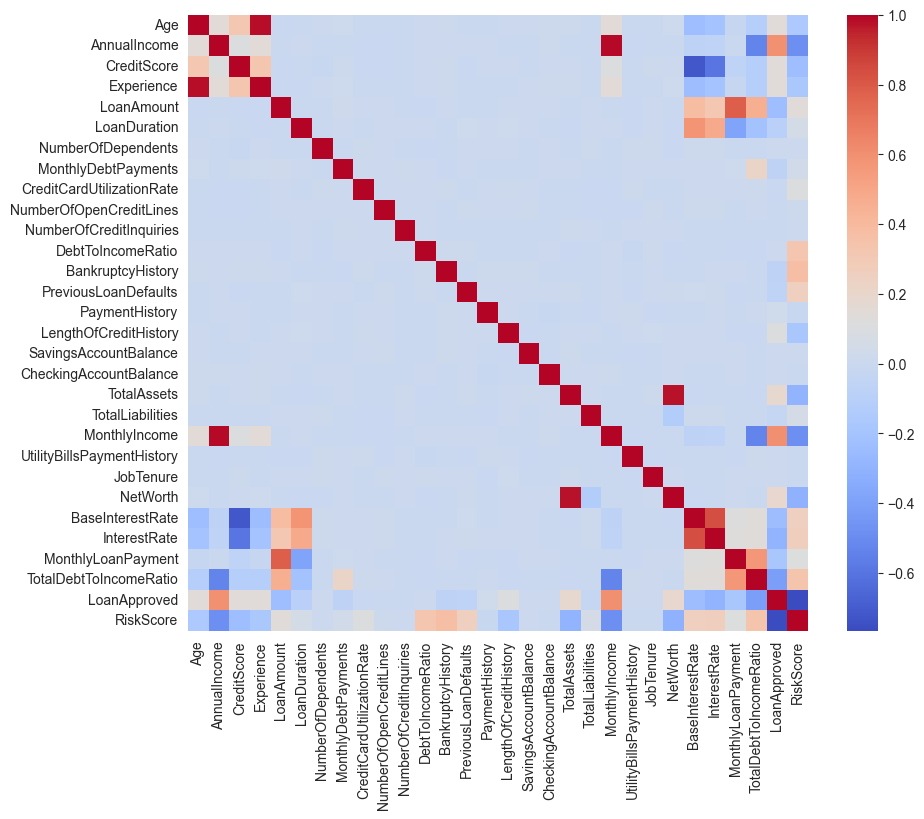

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()


## Relationship with Default

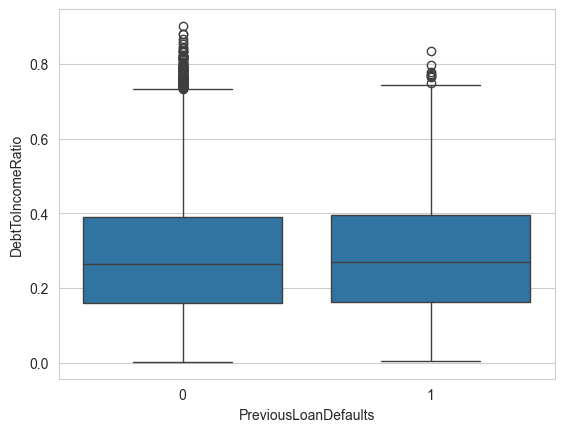

In [9]:
sns.boxplot(x="PreviousLoanDefaults", y="DebtToIncomeRatio", data=df)
plt.show()


In [17]:
num_cols = df.select_dtypes(include="number").columns
df_num = df[num_cols]

df_num.head()


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [18]:
df_num = df_num.drop(["LoanApproved", "RiskScore"], axis=1)


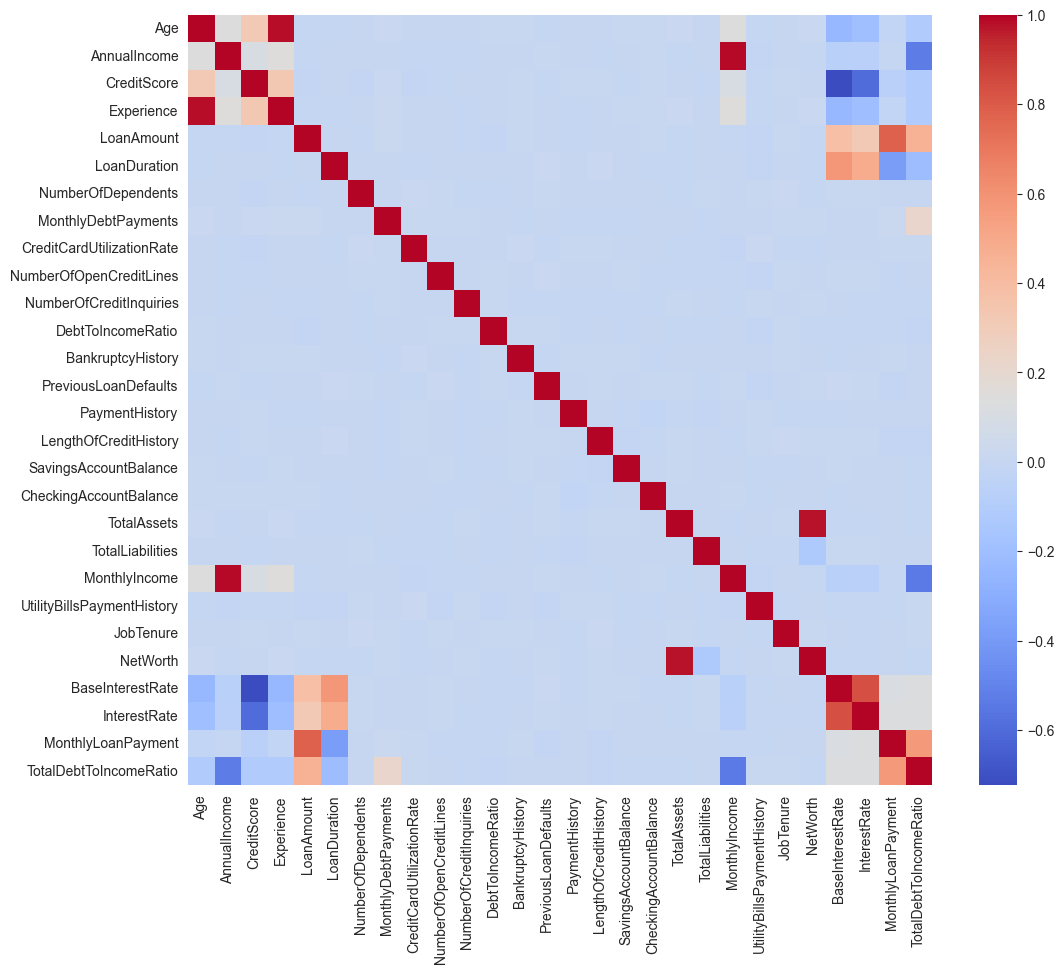

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(), cmap="coolwarm")
plt.show()

